图片数据一般有两种情况：

1、所有图片放在一个文件夹内，另外有一个txt文件显示标签。


2、不同类别的图片放在不同的文件夹内，文件夹就是图片的类别。

针对这两种不同的情况，数据集的准备也不相同，第一种情况可以自定义一个Dataset，第二种情况直接调用torchvision.datasets.ImageFolder来处理。下面分别进行说明：


In [1]:
import torch
import torchvision
from torchvision import transforms, utils
from PIL import Image
import numpy as np
import os

In [2]:
img_data = torchvision.datasets.ImageFolder('D:/CIFAR-10/images/train',
                                            transform=transforms.Compose([transforms.Scale(256),
                                                                          transforms.CenterCrop(224),
                                                                          transforms.ToTensor()])
                                           )

D:\Anaconda3\lib\site-packages\torchvision\transforms\transforms.py:219: UserWarning: The use of the transforms.Scale transform is deprecated, please use transforms.Resize instead.
  warnings.warn("The use of the transforms.Scale transform is deprecated, " +


In [3]:
img_data.classes

['cat', 'dog']

In [4]:
img_data.imgs[0]

('D:/CIFAR-10/images/train\\cat\\OIP.jpg', 0)

In [5]:
img_data.imgs[0][0]

'D:/CIFAR-10/images/train\\cat\\OIP.jpg'

In [6]:
img_data.class_to_idx

{'cat': 0, 'dog': 1}

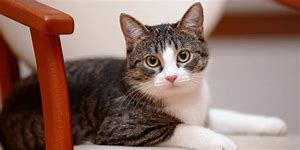

In [7]:
Image.open(img_data.imgs[0][0])

In [8]:
print(len(img_data))

922


In [9]:
data_loader = torch.utils.data.DataLoader(img_data, batch_size=4,shuffle=True)

In [10]:
data_loader

In [11]:
data_loader.dataset.imgs[700][0]

'D:/CIFAR-10/images/train\\dog\\[cn.bing.com][6705].jpg'

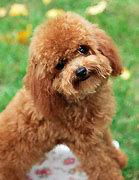

In [12]:
Image.open(data_loader.dataset.imgs[700][0])

In [13]:
data_loader.collate_fn

<function torch.utils.data._utils.collate.default_collate(batch)>

## 总结一下第一种方法

In [75]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch import nn
from torch import optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models


"""
    =========================== 模型训练与验证 ================================
"""
# 定义train/validation数据集加载器

data_dir = 'D:/CIFAR-10/images/train'

def load_split_train_test(datadir,valid_size = 0.2):
    train_trainsforms = transforms.Compose([transforms.Resize((224,224)),
                                            transforms.ToTensor(),])
    test_trainsforms = transforms.Compose([transforms.Resize((224,224)),
                                           transforms.ToTensor(),])

    train_data = datasets.ImageFolder(datadir,transform=train_trainsforms)
    # print("train_data大小：",train_data[0][0].size())       # 查看resize(确保图像都有3通道)
    test_data = datasets.ImageFolder(datadir,transform=test_trainsforms)

    num_train = len(train_data)                               # 训练集数量
    indices = list(range(num_train))                          # 训练集索引

    split = int(np.floor(valid_size * num_train))             # 获取20%数据作为验证集
    np.random.shuffle(indices)                                # 打乱数据集

    from torch.utils.data.sampler import SubsetRandomSampler
    train_idx, test_idx = indices[split:], indices[:split]    # 获取训练集，测试集
    train_sampler = SubsetRandomSampler(train_idx)            # 打乱训练集，测试集
    test_sampler  = SubsetRandomSampler(test_idx)

    #============数据加载器：加载训练集，测试集===================
    train_loader = DataLoader(train_data,sampler=train_sampler,batch_size=4)
    test_loader = DataLoader(test_data,sampler=test_sampler,batch_size=4)
    return train_loader,test_loader


train_loader,test_loader = load_split_train_test(data_dir, 0.2)

In [76]:
print(len(train_loader))
print(len(test_loader))

185
46


## 接下来是第二种情况，也是较为复杂的情况

第二种情况就是，所有文件都在一个文件夹下有图片，还必须要有事先标注好的label标签文件。

制作个人分类用数据集具体步骤如下：
1、将个人收集的图片归到一个文件夹内如下图：

<img src="https://img-blog.csdnimg.cn/20190905091913135.png" />

In [82]:
from torchvision import transforms, utils
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
from PIL import Image


def default_loader(path):
    return Image.open(path).convert('RGB')


class MyDataset(Dataset):
    def __init__(self, txt, transform=None, target_transform=None, loader=default_loader):
        fh = open(txt, 'r')
        imgs = []
        for line in fh:
            line = line.strip('\n')
            line = line.rstrip()
            words = line.split()
            imgs.append((words[0],int(words[1])))
        self.imgs = imgs
        self.transform = transform
        self.target_transform = target_transform
        self.loader = loader

    def __getitem__(self, index):
        fn, label = self.imgs[index]
        img = self.loader(fn)
        if self.transform is not None:
            img = self.transform(img)
        return img,label

    def __len__(self):
        return len(self.imgs)

train_data=MyDataset(txt='D:/CIFAR-10/images/data/label.txt', transform=transforms.ToTensor())
data_loader = DataLoader(train_data, batch_size=1,shuffle=True)
print(len(data_loader))

10


**对于拆分训练验证数据集，请参照第一种方法**

In [87]:
data_loader.dataset.imgs

[('D:/CIFAR-10/images/data/0.jpg', 0),
 ('D:/CIFAR-10/images/data/1.jpg', 1),
 ('D:/CIFAR-10/images/data/2.jpg', 0),
 ('D:/CIFAR-10/images/data/3.jpg', 1),
 ('D:/CIFAR-10/images/data/4.jpg', 1),
 ('D:/CIFAR-10/images/data/5.jpg', 0),
 ('D:/CIFAR-10/images/data/6.jpg', 1),
 ('D:/CIFAR-10/images/data/7.jpg', 1),
 ('D:/CIFAR-10/images/data/8.jpg', 0),
 ('D:/CIFAR-10/images/data/9.jpg', 0)]

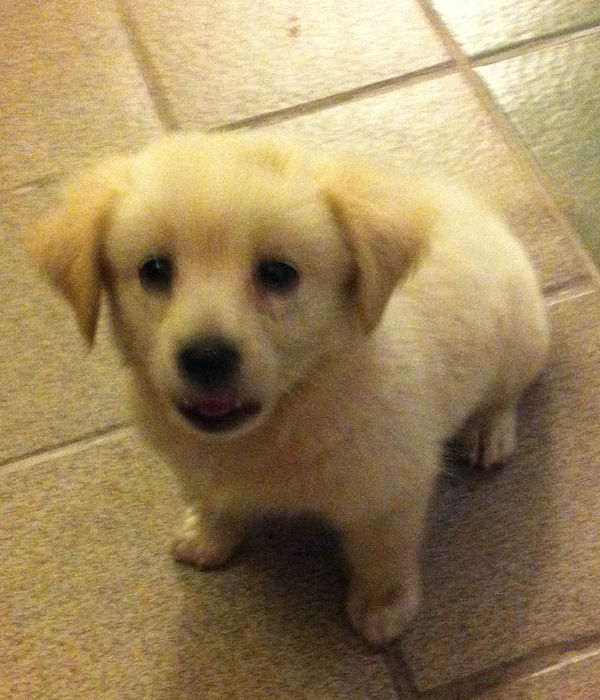

In [88]:
Image.open(data_loader.dataset.imgs[0][0])